In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
dataset = pd.read_csv("census_tracts_data.csv")

In [4]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 147 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    Geo_FIPS           56 non-null     int64  
 1    Geo_QName          56 non-null     object 
 2    Geo_FILEID         56 non-null     object 
 3    Geo_STUSAB         56 non-null     object 
 4    Geo_SUMLEV         56 non-null     int64  
 5    Geo_GEOCOMP        56 non-null     int64  
 6    Geo_LOGRECNO       56 non-null     int64  
 7    Geo_US             0 non-null      float64
 8    Geo_REGION         0 non-null      float64
 9    Geo_DIVISION       0 non-null      float64
 10   Geo_STATECE        0 non-null      float64
 11   Geo_STATE          56 non-null     int64  
 12   Geo_COUNTY         56 non-null     int64  
 13   Geo_COUSUB         0 non-null      float64
 14   Geo_PLACE          0 non-null      float64
 15   Geo_TRACT          56 non-null     int64  
 16   Geo_BLKG

In [5]:
dataset = dataset.dropna(axis=1,how="all")

In [6]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A03001_001',
                  'SE_A03001_002',
                  'SE_A03001_003',
                  'SE_A03001_005',
                  'SE_A01001_011',
                  'SE_A01001_012',
                  'SE_A01001_013',
                  'SE_A14001_001',
                  'SE_A14001_002',
                  'SE_A14001_003',
                  'SE_A14001_004',
                  'SE_A14001_005',
                  'SE_A14001_006',
                  'SE_A14001_007',
                  'SE_A14001_008',
                  'SE_A09005_001',
                  'SE_A09005_003']

dataset2 = dataset[columns_to_keep]

In [7]:
dataset2.columns = ['FIPS',
'Total Population','White Alone','Black or African American Alone',
                   'Asian Alone', '65 to 74 years', '75 to 84 years', '85 years and above',
                   'Households','Less than $10,000', '$10,000 to $14,999', '$15,000 to $19,999',
                   '$20,000 to $24,999', '$25,000 to 29,999','$30,000 to $34,999','$35,000 to $39,999',
                   'Workers 16 years and over','Public Transportation (Includes Taxicab)']

In [8]:
dataset2.sample(5)

,FIPS,Total Population,White Alone,Black or African American Alone,Asian Alone,65 to 74 years,75 to 84 years,85 years and above,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to 29,999","$30,000 to $34,999","$35,000 to $39,999",Workers 16 years and over,Public Transportation (Includes Taxicab)
29,6001406300,4557,816,956,911,352,198,34,1344,44,200,31,88,31,45,67,2311,624
16,6001403402,1197,513,217,258,87,0,0,791,0,0,15,110,21,0,116,974,445
10,6001402900,1638,426,291,742,216,149,120,1025,170,159,42,107,4,50,35,789,400
45,6001427800,4268,2144,263,1104,405,180,65,1886,52,32,12,179,17,36,59,2414,465
32,6001406601,4740,1098,1084,959,437,140,69,1817,131,20,88,110,49,95,34,2371,239


In [9]:
geom_data = pd.read_csv('bus_route_tracts.csv')

In [10]:
geom_data.sample(5)

,TRACTCE,STATEFP,COUNTYFP,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,PCINECTA,MTFCC_2,FUNCSTAT_2,ALAND_2,AWATER_2,INTPTLAT_2,INTPTLON_2,DIRCDESC,PUB_RTE,geometry
45,427800,6,1,6001427800,4278.00,Census Tract 4278,G5020,S,831152,0,...,NaN,G4110,A,26934009,32581545,37.741911,-122.259914,Northbound,51A,POLYGON ((-13611801.57586309 4547290.458687242...
27,406201,6,1,6001406201,4062.01,Census Tract 4062.01,G5020,S,408064,0,...,NaN,G4110,A,144944705,57160794,37.769846,-122.225690,Eastbound,20,POLYGON ((-13607195.17533406 4548929.427024485...
23,404200,6,1,6001404200,4042.00,Census Tract 4042,G5020,S,2728225,0,...,NaN,G4110,A,144944705,57160794,37.769846,-122.225690,Northbound,51A,POLYGON ((-13609061.78055568 4556109.592151667...
13,403301,6,1,6001403301,4033.01,Census Tract 4033.01,G5020,S,196598,0,...,NaN,G4110,A,144944705,57160794,37.769846,-122.225690,Northbound,51A,"POLYGON ((-13611040.9297825 4550737.704104832,..."
9,402802,6,1,6001402802,4028.02,Census Tract 4028.02,G5020,S,118446,0,...,NaN,G4110,A,144944705,57160794,37.769846,-122.225690,Northbound,51A,POLYGON ((-13611662.76045807 4552162.064995428...


In [11]:
geom_data = geom_data.rename(columns = {"GEOID":"FIPS"})
geom_data = geom_data[["FIPS", "geometry"]]

In [12]:
geom_data.sample(5)

,FIPS,geometry
24,6001404300,POLYGON ((-13608867.86200272 4556503.976232736...
9,6001402802,POLYGON ((-13611662.76045807 4552162.064995428...
16,6001403402,POLYGON ((-13610696.95255595 4551441.970547473...
27,6001406201,POLYGON ((-13607195.17533406 4548929.427024485...
5,6001401300,"POLYGON ((-13611390.80694206 4553026.77957176,..."


In [13]:
joined_data = dataset2.merge(right=geom_data, on="FIPS")
joined_data.head()

,FIPS,Total Population,White Alone,Black or African American Alone,Asian Alone,65 to 74 years,75 to 84 years,85 years and above,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to 29,999","$30,000 to $34,999","$35,000 to $39,999",Workers 16 years and over,Public Transportation (Includes Taxicab),geometry
0,6001400200,2038,1498,48,197,294,152,28,868,0,19,0,0,0,8,2,1096,318,POLYGON ((-13609668.02650254 4557245.143044413...
1,6001400300,5449,3410,530,640,548,217,208,2548,78,104,47,85,60,46,0,3289,954,POLYGON ((-13610540.43735189 4556544.289386773...
2,6001400400,4384,3061,367,356,346,121,65,1826,32,42,69,25,37,15,10,2584,500,POLYGON ((-13610121.87606651 4557100.091216017...
3,6001401100,5204,2441,933,914,256,43,38,2428,174,11,41,101,47,0,66,3257,1373,POLYGON ((-13610864.48838959 4554707.239539972...
4,6001401200,2800,1796,286,312,138,79,24,1360,26,44,30,10,43,73,21,1872,523,POLYGON ((-13610152.04364851 4554551.794405404...


In [14]:
joined_data['geometry'] = gpd.GeoSeries.from_wkt(joined_data['geometry'])
geo_df = gpd.GeoDataFrame(joined_data, geometry='geometry')

In [15]:
joined_data['PCT_Black'] = joined_data['Black or African American Alone']/joined_data['Total Population']*100

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Census Tracts for AC Transit 19,20 & 51A by percentage Black population')

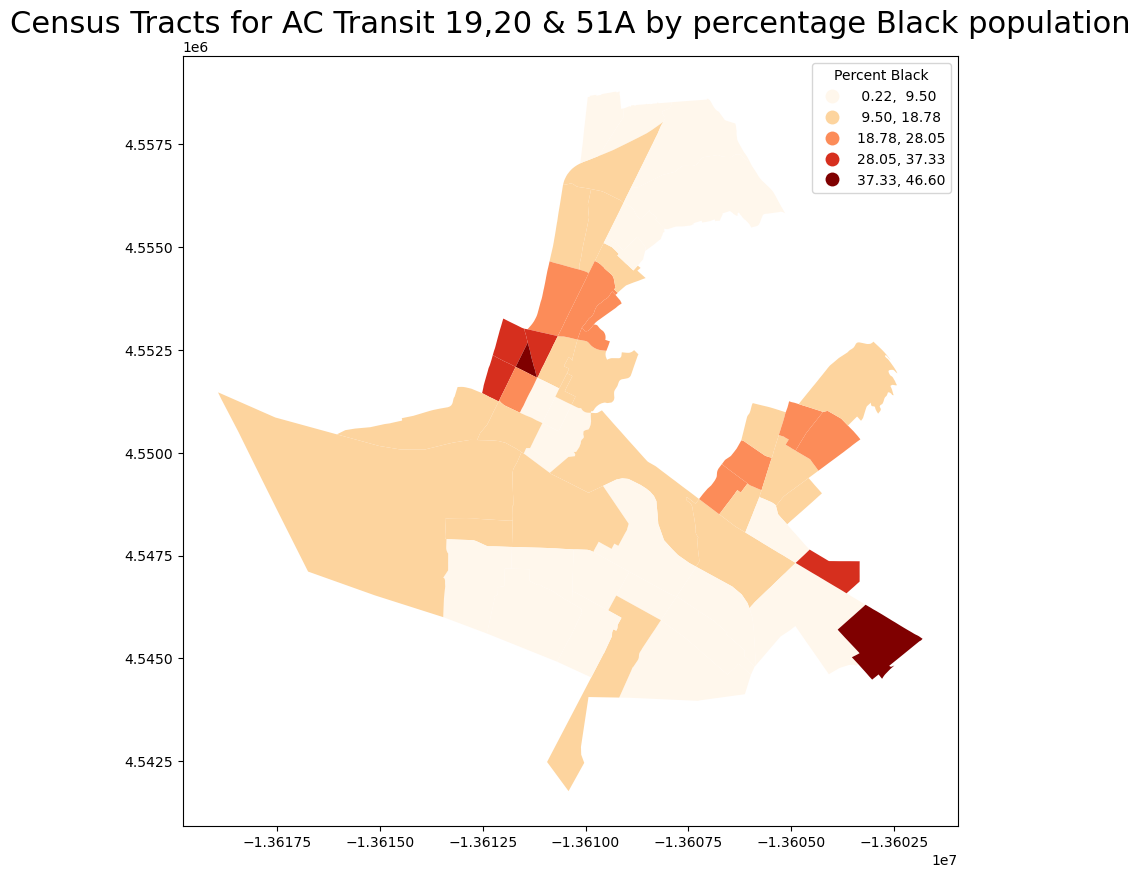

In [17]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Black',
                 legend=True,
                cmap='OrRd',
                 scheme='equal_interval',
           legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
               'title': 'Percent Black'
            })
plt.title(label="Census Tracts for AC Transit 19,20 & 51A by percentage Black population",
          fontsize=22,
          color="black")

In [18]:
joined_data['PCT_Asian'] = joined_data['Asian Alone']/joined_data['Total Population']*100

Text(0.5, 1.0, 'Census Tracts for AC Transit 19,20 & 51A by percentage Asian population')

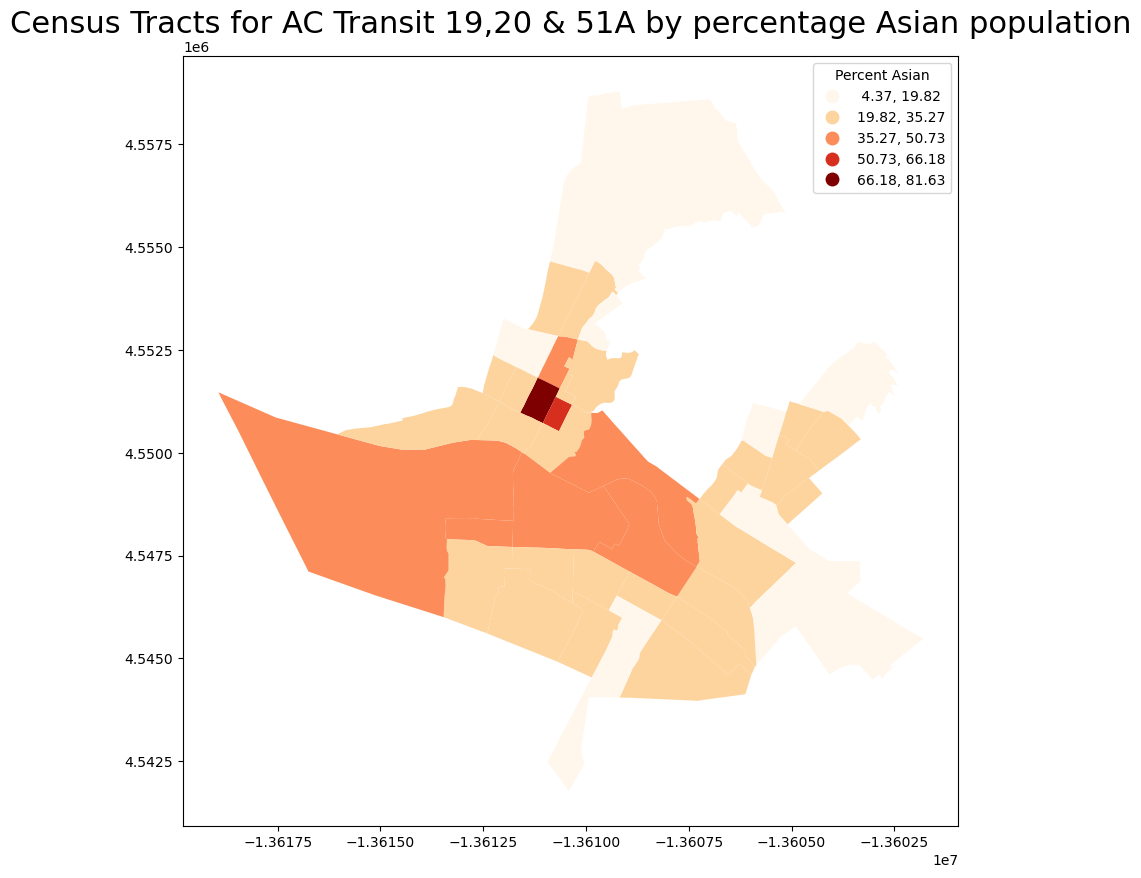

In [19]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Asian',
                 legend=True,
                cmap='OrRd',
                 scheme='equal_interval',
           legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
               'title': 'Percent Asian'
            })
plt.title(label="Census Tracts for AC Transit 19,20 & 51A by percentage Asian population", fontsize=22, color="black")

In [23]:
joined_data['Low_Income'] = joined_data['Less than $10,000'] + joined_data ['$10,000 to $14,999'] + joined_data['$15,000 to $19,999'] + joined_data['$20,000 to $24,999']+ joined_data['$25,000 to 29,999']+ joined_data['$30,000 to $34,999']+joined_data['$35,000 to $39,999']

In [24]:
joined_data['PCT_low_income'] = joined_data['Low_Income']/joined_data['Households']*100

Text(0.5, 1.0, 'Census Tracts for AC Transit 19,20 & 51A by percentage low income households (Under $40,000)')

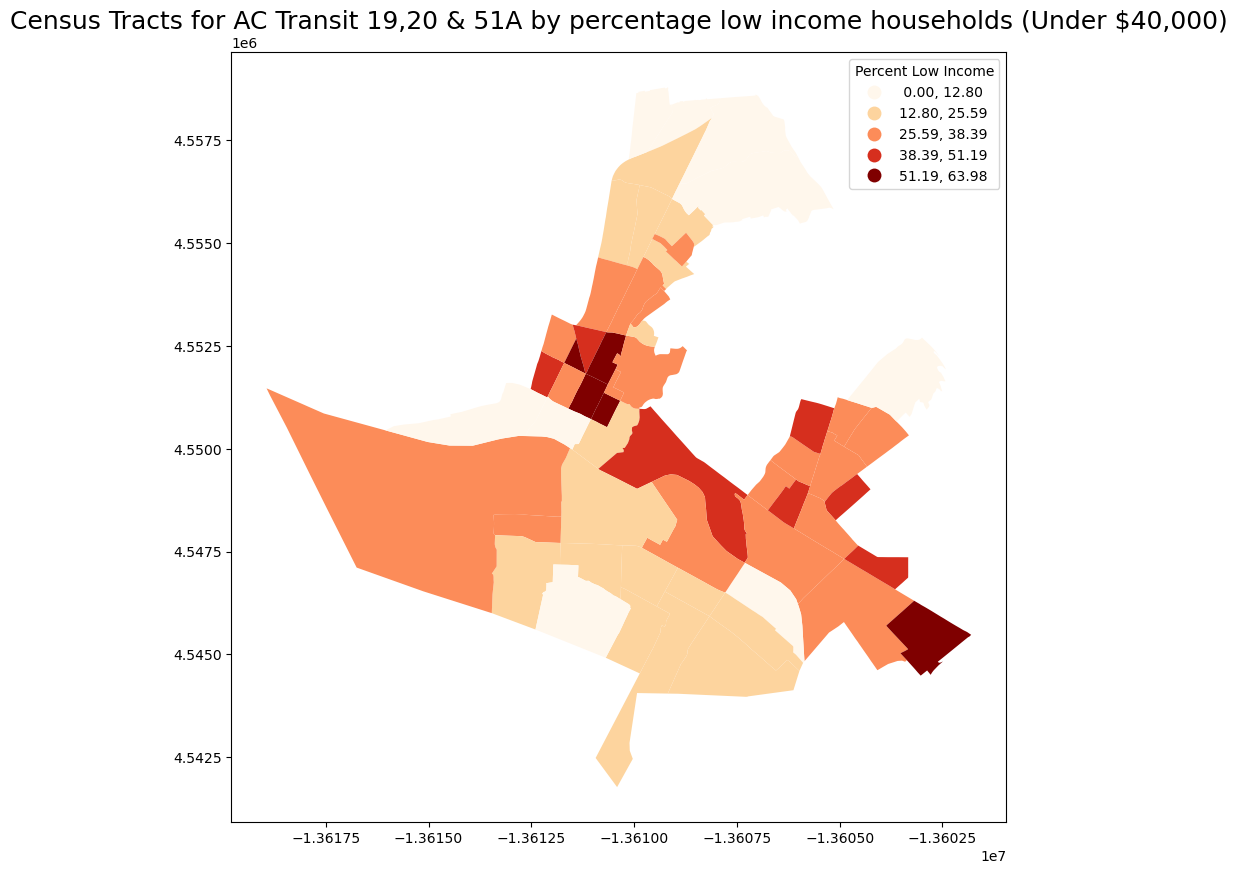

In [25]:
geo_df.plot(figsize=(12,10),
                 column='PCT_low_income',
                 legend=True,
                cmap='OrRd',
                 scheme='equal_interval',
           legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
               'title': 'Percent Low Income'
            })
plt.title(label="Census Tracts for AC Transit 19,20 & 51A by percentage low income households (Under $40,000)", fontsize=18, color="black")

In [26]:
joined_data['PCT_Take_Transit'] = joined_data['Public Transportation (Includes Taxicab)']/joined_data['Workers 16 years and over']*100

Text(0.5, 1.0, 'Census Tracts for AC Transit 19,20 & 51A by percentage of workers who use public transportation')

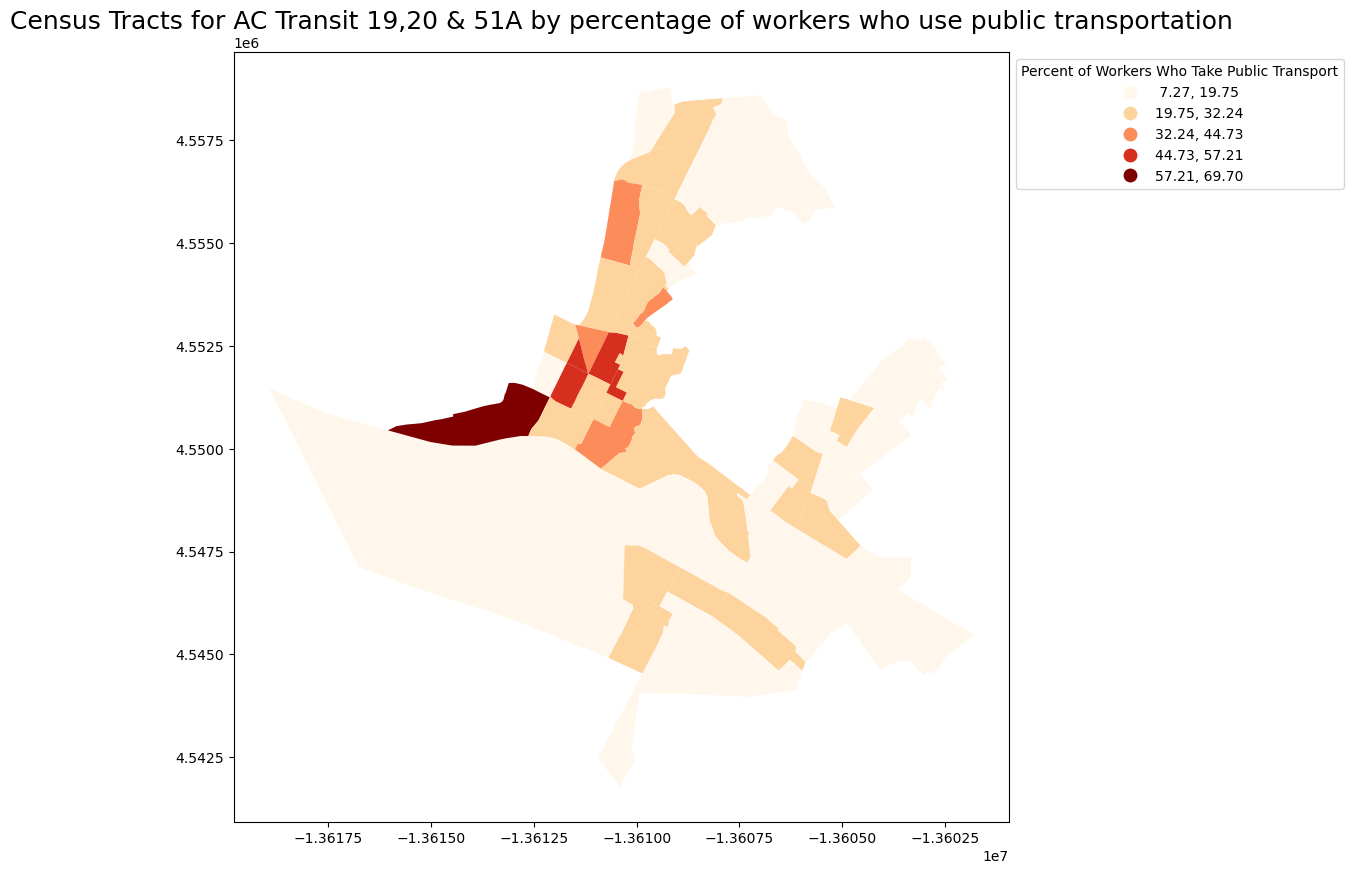

In [29]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Take_Transit',
                 legend=True,
                cmap='OrRd',
                 scheme='equal_interval',
           legend_kwds={
               'loc': 'upper left',
               'bbox_to_anchor':(1,1),
               'title': 'Percent of Workers Who Take Public Transport'
            })
plt.title(label="Census Tracts for AC Transit 19,20 & 51A by percentage of workers who use public transportation", fontsize=18, color="black")

In [94]:
df = gpd.read_file("filtered_bus_routes.shx")

<AxesSubplot: >

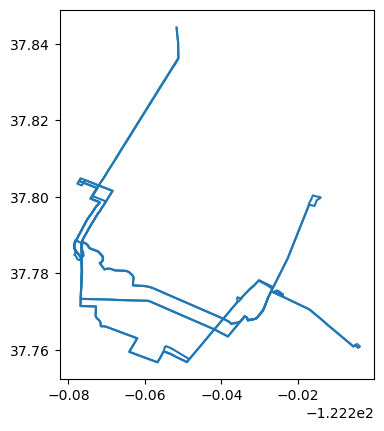

In [95]:
df.plot()

In [96]:
df.head()

,geometry
0,"MULTILINESTRING ((-122.22428 37.77403, -122.22..."
1,"MULTILINESTRING ((-122.20449 37.76143, -122.20..."
2,"MULTILINESTRING ((-122.25025 37.75738, -122.25..."
3,"MULTILINESTRING ((-122.24954 37.75703, -122.24..."
4,"LINESTRING (-122.22469 37.77492, -122.22479 37..."


In [98]:
print(geo_df.geometry.head())

0    POLYGON ((-13609668.027 4557245.143, -13609655...
1    POLYGON ((-13610540.437 4556544.289, -13610534...
2    POLYGON ((-13610121.876 4557100.091, -13610116...
3    POLYGON ((-13610864.488 4554707.240, -13610857...
4    POLYGON ((-13610152.044 4554551.794, -13610151...
Name: geometry, dtype: geometry


In [99]:
bus_stops = gpd.read_file("bus_stops_51A.shx")


<AxesSubplot: >

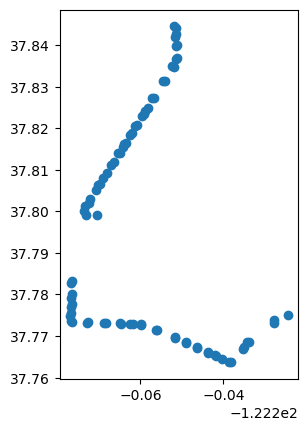

In [100]:
bus_stops.plot()

In [103]:
base=df.plot
bus_stops.plot(ax=base, color='red');

AttributeError: 'GeoplotAccessor' object has no attribute 'set_aspect'

In [104]:
oakland = gpd.read_file("oakland_alameda.shx")

<AxesSubplot: >

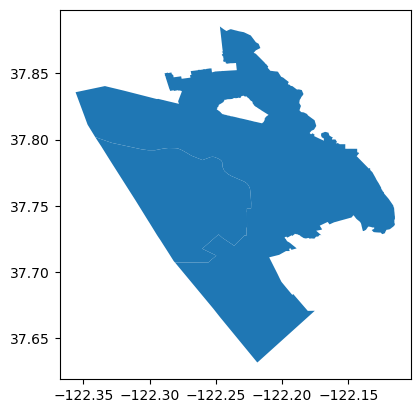

In [105]:
oakland.plot()

Text(0.5, 1.0, 'AC Transit Routes 19,20 and 51A in Oakland/Alameda')

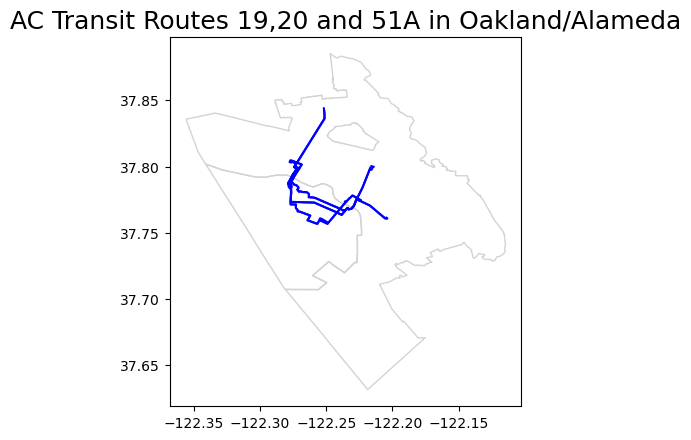

In [108]:
base=oakland.plot(color='none', edgecolor='lightgrey')
df.plot(axes=base, color='blue')

plt.title(label="AC Transit Routes 19,20 and 51A in Oakland/Alameda", fontsize=18, color="black")
